# Generate Dataset from Dota2 API

## Get Sumail's latest 500 Dota2 game

In [186]:
import time
import urllib2

# limit: 500
# game_mode: 1.All pick  3.Random Draft (most popular game mode)
# version: 7.07 (latest game version)
player_dat = urllib2.urlopen("https://api.opendota.com/api/players/111620041/matches?limit=500#game_mode=1,3#patch=7.07").read()
print player_dat

[{"match_id":3564103153,"player_slot":2,"radiant_win":false,"duration":1973,"game_mode":22,"lobby_type":7,"hero_id":107,"start_time":1510786739,"version":null,"kills":4,"deaths":9,"assists":7,"skill":null,"leaver_status":0,"party_size":null},{"match_id":3559037317,"player_slot":0,"radiant_win":true,"duration":2231,"game_mode":2,"lobby_type":1,"hero_id":13,"start_time":1510535111,"version":20,"kills":3,"deaths":3,"assists":14,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558979253,"player_slot":0,"radiant_win":true,"duration":3048,"game_mode":2,"lobby_type":1,"hero_id":39,"start_time":1510530310,"version":20,"kills":10,"deaths":5,"assists":7,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558793494,"player_slot":0,"radiant_win":true,"duration":1894,"game_mode":2,"lobby_type":1,"hero_id":94,"start_time":1510517700,"version":20,"kills":6,"deaths":3,"assists":12,"skill":null,"leaver_status":0,"party_size":10},{"match_id":3558701651,"player_slot":0,"radiant_win":

## Extract 500 match id

In [181]:
player_dat_json = json.loads(player_dat)
sumail_match_id = []
f_sumail = open('sumail_match_id.txt','w')
for i in player_dat_json:
    sumail_match_id.append(i["match_id"])
    f_sumail.write(str(i["match_id"]) + '\n')
f_sumail.close()

## Get 500 matchs information

In [188]:
sumail_dat = []
ff_sumail = open('sumail_match.txt', 'w')
for i in range(0,100):
    match_dat = urllib2.urlopen("https://api.opendota.com/api/matches/" + str(sumail_match_id[i])).read()
    time.sleep(0.5)
    sumail_dat.append(match_dat)
    ff_sumail.write(match_dat + '\n')
    print i 
ff_sumail.close()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Extracte certain variable

In [238]:
def player_avg_1(matches, field):
    field_avg = 0.0
    num = len(matches)
    for i in matches:
        i_json = json.loads(i)
        field_avg += i_json[field]/float(num)
    return field_avg

def dat_dist_1(matches, field):
    match_fields = []
    f = open('match_' + field + '.csv', 'w')
    for i in json.loads(matches[0]):
        f.write(str(i[field]) + '\n')
        match_fields.append(i[field])
    f.close()
    return match_fields
       

In [176]:
import time
num_match = 1000
match_array = []
f = open("match_dat.txt", 'a')
for i in range(num_match):
    data = urllib2.urlopen("https://api.opendota.com/api/publicMatches").read()
    f.write(data + '\n')
    time.sleep(0.2)
    match_array.append(data)
f.close()

HTTPError: HTTP Error 429: Too Many Requests

In [239]:
sumail_avg_duration = player_avg_1(sumail_dat, 'duration')
duration_dist = dat_dist_1(match_array, 'duration')
print(duration_dist)

[1468, 1389, 1585, 1392, 1807, 1482, 1858, 1930, 1619, 1959, 1563, 1889, 1637, 1673, 1793, 1793, 2118, 1121, 1634, 2187, 1739, 1798, 2213, 2234, 2170, 2209, 2418, 1716, 1703, 2374, 2225, 2489, 2236, 2297, 1590, 2321, 1694, 1647, 1940, 1966, 2124, 1921, 2387, 2126, 2525, 1763, 2458, 2218, 2157, 1770, 2045, 2248, 2084, 2209, 1470, 2358, 1935, 2408, 1500, 1944, 2070, 1981, 1981, 2445, 1961, 2478, 1898, 2207, 2196, 682, 2186, 1847, 1985, 2371, 2490, 2604, 1685, 2147, 2439, 1596, 1605, 2466, 1777, 1847, 1964, 1770, 1950, 2425, 1990, 2082, 2310, 1970, 2239, 2652, 2779, 2565, 2674, 2696, 2078, 2014]


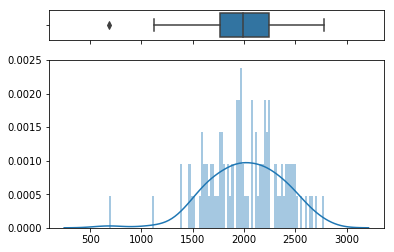

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#test = pd.read_csv("test.csv")
#print test
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(duration_dist, ax=ax_box)
sns.distplot(duration_dist, ax=ax_hist, hist=True, kde=True, rug=False, bins = 100)
ax_box.set(xlabel='')
plt.show()